In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [85]:
cluster_my = pd.read_csv(r"C:\Users\amirj\OneDrive\Desktop\Food Nexus\All_withcluster.csv")
cluster_my

,gdp_1995,gdp_2005,gdp_2010,gdp_2015,gdp_2020,population_1995,population_2005,population_2010,population_2015,population_2020,land_1995,land_2005,land_2010,land_2015,land_2020,precipitation_avg,Country,Cluster,Silhouette
0,476.0,1902.0,3588.0,4167.0,1896.0,13912.253,19450.959,23364.185,28127.721,33428.486,44490.0,44183.0,44850.0,45789.0,45892.0,1010.0,Angola,C4,0.573004
1,8407.0,12459.0,13049.0,14286.0,13993.0,68.398,79.869,85.695,89.941,92.664,9.0,9.0,9.0,9.0,9.0,1030.0,Antigua and Barbuda,C1,0.632920
2,8637.0,14242.0,16056.0,16525.0,15449.0,262.303,269.477,274.711,278.083,280.693,19.0,16.0,15.0,11.0,10.0,1422.0,Barbados,C1,0.625014
3,2998.0,3916.0,4304.0,4805.0,3988.0,203.556,280.375,322.106,359.871,394.921,146.0,152.0,157.0,170.0,180.0,1705.0,Belize,C1,0.693846
4,397.0,602.0,758.0,1076.0,1254.0,6046.511,8149.419,9445.710,10932.783,12643.123,2520.0,3484.0,3650.0,3950.0,3950.0,1039.0,Benin,C1,0.679632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,393.0,406.0,534.0,730.0,863.0,4279.566,5711.597,6571.855,7473.229,8442.580,3270.0,3520.0,3665.0,3820.0,3820.0,1168.0,Togo,C1,0.681879
64,4264.0,12369.0,16714.0,18384.0,15286.0,1307.822,1369.075,1410.296,1460.177,1518.147,76.0,54.0,54.0,54.0,54.0,2200.0,Trinidad and Tobago,C1,0.636682
65,350.0,403.0,947.0,766.0,846.0,20680.831,27946.588,32341.728,37477.356,44404.611,12122.0,13262.0,14265.0,14415.0,14415.0,1180.0,Uganda,C1,0.616652
66,1621.0,1887.0,2967.0,2802.0,2783.0,170.612,217.632,245.453,276.438,311.685,165.0,183.0,187.0,187.0,187.0,2000.0,Vanuatu,C1,0.695384


In [86]:
columns_to_keep = ["Country", "Cluster"]
new_cluster_my = cluster_my.loc[:, columns_to_keep]
new_cluster_my


,Country,Cluster
0,Angola,C4
1,Antigua and Barbuda,C1
2,Barbados,C1
3,Belize,C1
4,Benin,C1
...,...,...
63,Togo,C1
64,Trinidad and Tobago,C1
65,Uganda,C1
66,Vanuatu,C1


In [87]:
c1_cluster_my = new_cluster_my[new_cluster_my["Cluster"] == "C1"]
pd.set_option('display.max_rows', 10)  
c1_cluster_my

,Country,Cluster
1,Antigua and Barbuda,C1
2,Barbados,C1
3,Belize,C1
4,Benin,C1
5,Burkina Faso,C1
...,...,...
63,Togo,C1
64,Trinidad and Tobago,C1
65,Uganda,C1
66,Vanuatu,C1


In [88]:
c1_cluster_my = c1_cluster_my.rename(columns={"Country": "Area"})
c1_cluster_my


,Area,Cluster
1,Antigua and Barbuda,C1
2,Barbados,C1
3,Belize,C1
4,Benin,C1
5,Burkina Faso,C1
...,...,...
63,Togo,C1
64,Trinidad and Tobago,C1
65,Uganda,C1
66,Vanuatu,C1


In [89]:
ghg_emission = pd.read_csv(r"C:\Users\amirj\OneDrive\Desktop\Food Nexus\EmissionGHG.csv")
ghg_emission

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GT,Emissions totals,4,Afghanistan,7230,Emissions (N2O),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kt,1.0734,E,Estimated value,NaN
1,GT,Emissions totals,4,Afghanistan,7230,Emissions (N2O),5064,Crop Residues,1962,1962,3050,FAO TIER 1,kt,1.0816,E,Estimated value,NaN
2,GT,Emissions totals,4,Afghanistan,7230,Emissions (N2O),5064,Crop Residues,1963,1963,3050,FAO TIER 1,kt,1.0089,E,Estimated value,NaN
3,GT,Emissions totals,4,Afghanistan,7230,Emissions (N2O),5064,Crop Residues,1964,1964,3050,FAO TIER 1,kt,1.0880,E,Estimated value,NaN
4,GT,Emissions totals,4,Afghanistan,7230,Emissions (N2O),5064,Crop Residues,1965,1965,3050,FAO TIER 1,kt,1.0998,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82363,GT,Emissions totals,716,Zimbabwe,7230,Emissions (N2O),6997,Pesticides Manufacturing,2019,2019,3050,FAO TIER 1,kt,0.0000,E,Estimated value,NaN
82364,GT,Emissions totals,716,Zimbabwe,7273,Emissions (CO2),6997,Pesticides Manufacturing,2019,2019,3050,FAO TIER 1,kt,72.0000,E,Estimated value,NaN
82365,GT,Emissions totals,716,Zimbabwe,7225,Emissions (CH4),6997,Pesticides Manufacturing,2020,2020,3050,FAO TIER 1,kt,0.0000,E,Estimated value,NaN
82366,GT,Emissions totals,716,Zimbabwe,7230,Emissions (N2O),6997,Pesticides Manufacturing,2020,2020,3050,FAO TIER 1,kt,0.0000,E,Estimated value,NaN


In [90]:
ghg_emission_filtered = ghg_emission[ghg_emission['Year'].between(2016, 2020)]
ghg_emission_filtered = ghg_emission_filtered.groupby(['Area', 'Item'])['Value'].mean().unstack()
ghg_emission_filtered = ghg_emission_filtered.reset_index()
ghg_emission_filtered.columns.name = None
ghg_emission_filtered

,Area,Agrifood Systems Waste Disposal,Burning - Crop residues,Crop Residues,Fertilizers Manufacturing,Pesticides Manufacturing,Rice Cultivation,Synthetic Fertilizers
0,Afghanistan,50.398940,1.48391,1.39384,34.48606,NaN,17.39014,1.61120
1,Albania,18.453927,0.11318,0.14556,NaN,2.066667,NaN,0.74024
2,Algeria,160.843370,1.10453,1.43864,1276.01178,15.200000,0.04732,1.46170
3,American Samoa,0.037050,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,1.349960,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
215,Venezuela (Bolivarian Republic of),19.242850,0.79054,0.43974,4550.72666,29.333333,37.19606,3.64876
216,Viet Nam,212.948813,7.40600,10.08762,5286.62756,176.000000,1330.38746,33.28668
217,Yemen,48.760633,0.08144,0.15142,NaN,0.666667,NaN,0.22480
218,Zambia,34.687080,1.69391,0.66900,NaN,24.000000,1.83808,3.77352


In [91]:
merged_c1_ghg = c1_cluster_my.merge(ghg_emission_filtered, on='Area', how='inner')
merged_c1_ghg

,Area,Cluster,Agrifood Systems Waste Disposal,Burning - Crop residues,Crop Residues,Fertilizers Manufacturing,Pesticides Manufacturing,Rice Cultivation,Synthetic Fertilizers
0,Antigua and Barbuda,C1,1.802087,0.00004,0.00000,NaN,0.333333,NaN,0.00046
1,Barbados,C1,6.395240,0.00227,0.00000,NaN,4.000000,NaN,0.00574
2,Belize,C1,3.162850,0.06587,0.02356,NaN,5.866667,0.08726,0.30928
3,Benin,C1,13.528470,1.73822,0.57798,NaN,NaN,2.81962,0.80762
4,Burkina Faso,C1,40.540530,1.53044,1.28010,NaN,11.133333,42.72884,1.09540
...,...,...,...,...,...,...,...,...,...
48,Togo,C1,18.906530,1.04762,0.41814,NaN,14.933333,0.97410,0.18456
49,Trinidad and Tobago,C1,37.664567,0.00466,0.00160,6805.51794,10.400000,0.20984,0.13490
50,Uganda,C1,98.760950,1.70097,0.91690,NaN,0.333333,5.37706,0.19276
51,Vanuatu,C1,0.198100,0.00206,0.00028,NaN,1.133333,NaN,NaN


In [92]:
columns_to_impute = merged_c1_ghg.columns.difference(['Area', 'Cluster'])
mean_values = merged_c1_ghg[columns_to_impute].mean()
merged_c1_ghg[columns_to_impute] = merged_c1_ghg[columns_to_impute].fillna(mean_values)  
merged_c1_ghg


,Area,Cluster,Agrifood Systems Waste Disposal,Burning - Crop residues,Crop Residues,Fertilizers Manufacturing,Pesticides Manufacturing,Rice Cultivation,Synthetic Fertilizers
0,Antigua and Barbuda,C1,1.802087,0.00004,0.00000,1575.135355,0.333333,35.124142,0.000460
1,Barbados,C1,6.395240,0.00227,0.00000,1575.135355,4.000000,35.124142,0.005740
2,Belize,C1,3.162850,0.06587,0.02356,1575.135355,5.866667,0.087260,0.309280
3,Benin,C1,13.528470,1.73822,0.57798,1575.135355,39.562602,2.819620,0.807620
4,Burkina Faso,C1,40.540530,1.53044,1.28010,1575.135355,11.133333,42.728840,1.095400
...,...,...,...,...,...,...,...,...,...
48,Togo,C1,18.906530,1.04762,0.41814,1575.135355,14.933333,0.974100,0.184560
49,Trinidad and Tobago,C1,37.664567,0.00466,0.00160,6805.517940,10.400000,0.209840,0.134900
50,Uganda,C1,98.760950,1.70097,0.91690,1575.135355,0.333333,5.377060,0.192760
51,Vanuatu,C1,0.198100,0.00206,0.00028,1575.135355,1.133333,35.124142,1.235731


In [93]:
columns_to_exclude = ['Area', 'Cluster']
merged_c1_ghg['Sum_of_GHG'] = merged_c1_ghg[merged_c1_ghg.columns.difference(columns_to_exclude)].sum(axis=1)
merged_c1_ghg


,Area,Cluster,Agrifood Systems Waste Disposal,Burning - Crop residues,Crop Residues,Fertilizers Manufacturing,Pesticides Manufacturing,Rice Cultivation,Synthetic Fertilizers,Sum_of_GHG
0,Antigua and Barbuda,C1,1.802087,0.00004,0.00000,1575.135355,0.333333,35.124142,0.000460,1612.395416
1,Barbados,C1,6.395240,0.00227,0.00000,1575.135355,4.000000,35.124142,0.005740,1620.662746
2,Belize,C1,3.162850,0.06587,0.02356,1575.135355,5.866667,0.087260,0.309280,1584.650842
3,Benin,C1,13.528470,1.73822,0.57798,1575.135355,39.562602,2.819620,0.807620,1634.169867
4,Burkina Faso,C1,40.540530,1.53044,1.28010,1575.135355,11.133333,42.728840,1.095400,1673.443998
...,...,...,...,...,...,...,...,...,...,...
48,Togo,C1,18.906530,1.04762,0.41814,1575.135355,14.933333,0.974100,0.184560,1611.599638
49,Trinidad and Tobago,C1,37.664567,0.00466,0.00160,6805.517940,10.400000,0.209840,0.134900,6853.933507
50,Uganda,C1,98.760950,1.70097,0.91690,1575.135355,0.333333,5.377060,0.192760,1682.417328
51,Vanuatu,C1,0.198100,0.00206,0.00028,1575.135355,1.133333,35.124142,1.235731,1612.829001


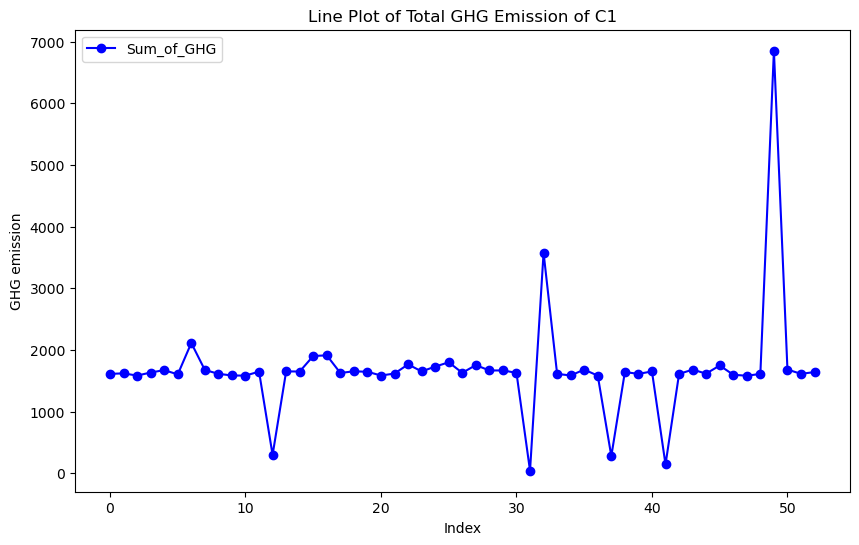

In [94]:
sum_of_ghg = merged_c1_ghg['Sum_of_GHG']
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sum_of_ghg, marker='o', linestyle='-', color='b', label='Sum_of_GHG')
ax.set_xlabel('Index')
ax.set_ylabel('GHG emission')
ax.set_title('Line Plot of Total GHG Emission of C1')
ax.legend()
plt.show()


In [95]:
emission = pd.read_csv(r"C:\Users\amirj\OneDrive\Desktop\Food Nexus\EmissionGHG.csv")
emission['Year'] = pd.to_datetime(emission['Year'], format='%Y')
latest_year = emission['Year'].max()
filtered_emission = emission[emission['Year'] >= '1990-01-01']
filtered_emission



,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
29,GT,Emissions totals,4,Afghanistan,7230,Emissions (N2O),5064,Crop Residues,1990,1990-01-01,3050,FAO TIER 1,kt,0.7759,E,Estimated value,NaN
30,GT,Emissions totals,4,Afghanistan,7230,Emissions (N2O),5064,Crop Residues,1991,1991-01-01,3050,FAO TIER 1,kt,0.7906,E,Estimated value,NaN
31,GT,Emissions totals,4,Afghanistan,7230,Emissions (N2O),5064,Crop Residues,1992,1992-01-01,3050,FAO TIER 1,kt,0.7416,E,Estimated value,NaN
32,GT,Emissions totals,4,Afghanistan,7230,Emissions (N2O),5064,Crop Residues,1993,1993-01-01,3050,FAO TIER 1,kt,0.8710,E,Estimated value,NaN
33,GT,Emissions totals,4,Afghanistan,7230,Emissions (N2O),5064,Crop Residues,1994,1994-01-01,3050,FAO TIER 1,kt,0.9134,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82363,GT,Emissions totals,716,Zimbabwe,7230,Emissions (N2O),6997,Pesticides Manufacturing,2019,2019-01-01,3050,FAO TIER 1,kt,0.0000,E,Estimated value,NaN
82364,GT,Emissions totals,716,Zimbabwe,7273,Emissions (CO2),6997,Pesticides Manufacturing,2019,2019-01-01,3050,FAO TIER 1,kt,72.0000,E,Estimated value,NaN
82365,GT,Emissions totals,716,Zimbabwe,7225,Emissions (CH4),6997,Pesticides Manufacturing,2020,2020-01-01,3050,FAO TIER 1,kt,0.0000,E,Estimated value,NaN
82366,GT,Emissions totals,716,Zimbabwe,7230,Emissions (N2O),6997,Pesticides Manufacturing,2020,2020-01-01,3050,FAO TIER 1,kt,0.0000,E,Estimated value,NaN


In [96]:
columns_to_keep = ['Area', 'Element', 'Item', 'Year', 'Value']

filtered_emission = filtered_emission[columns_to_keep]
filtered_emission

,Area,Element,Item,Year,Value
29,Afghanistan,Emissions (N2O),Crop Residues,1990-01-01,0.7759
30,Afghanistan,Emissions (N2O),Crop Residues,1991-01-01,0.7906
31,Afghanistan,Emissions (N2O),Crop Residues,1992-01-01,0.7416
32,Afghanistan,Emissions (N2O),Crop Residues,1993-01-01,0.8710
33,Afghanistan,Emissions (N2O),Crop Residues,1994-01-01,0.9134
...,...,...,...,...,...
82363,Zimbabwe,Emissions (N2O),Pesticides Manufacturing,2019-01-01,0.0000
82364,Zimbabwe,Emissions (CO2),Pesticides Manufacturing,2019-01-01,72.0000
82365,Zimbabwe,Emissions (CH4),Pesticides Manufacturing,2020-01-01,0.0000
82366,Zimbabwe,Emissions (N2O),Pesticides Manufacturing,2020-01-01,0.0000


In [97]:
filtered_emission = merged_c1_ghg.merge(filtered_emission, on='Area', how='inner')
filtered_emission

,Area,Cluster,Agrifood Systems Waste Disposal,Burning - Crop residues,Crop Residues,Fertilizers Manufacturing,Pesticides Manufacturing,Rice Cultivation,Synthetic Fertilizers,Sum_of_GHG,Element,Item,Year,Value
0,Antigua and Barbuda,C1,1.802087,0.00004,0.000,1575.135355,0.333333,35.124142,0.00046,1612.395416,Emissions (N2O),Crop Residues,1990-01-01,0.0
1,Antigua and Barbuda,C1,1.802087,0.00004,0.000,1575.135355,0.333333,35.124142,0.00046,1612.395416,Emissions (N2O),Crop Residues,1991-01-01,0.0
2,Antigua and Barbuda,C1,1.802087,0.00004,0.000,1575.135355,0.333333,35.124142,0.00046,1612.395416,Emissions (N2O),Crop Residues,1992-01-01,0.0
3,Antigua and Barbuda,C1,1.802087,0.00004,0.000,1575.135355,0.333333,35.124142,0.00046,1612.395416,Emissions (N2O),Crop Residues,1993-01-01,0.0
4,Antigua and Barbuda,C1,1.802087,0.00004,0.000,1575.135355,0.333333,35.124142,0.00046,1612.395416,Emissions (N2O),Crop Residues,1994-01-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14898,Zambia,C1,34.687080,1.69391,0.669,1575.135355,24.000000,1.838080,3.77352,1641.796945,Emissions (N2O),Pesticides Manufacturing,2019-01-01,0.0
14899,Zambia,C1,34.687080,1.69391,0.669,1575.135355,24.000000,1.838080,3.77352,1641.796945,Emissions (CO2),Pesticides Manufacturing,2019-01-01,74.0
14900,Zambia,C1,34.687080,1.69391,0.669,1575.135355,24.000000,1.838080,3.77352,1641.796945,Emissions (CH4),Pesticides Manufacturing,2020-01-01,0.0
14901,Zambia,C1,34.687080,1.69391,0.669,1575.135355,24.000000,1.838080,3.77352,1641.796945,Emissions (N2O),Pesticides Manufacturing,2020-01-01,0.0


In [98]:
total_ghg_by_country_year = filtered_emission.groupby(['Area', 'Year'])['Value'].sum().reset_index()
fig = px.line(total_ghg_by_country_year, x='Year', y='Value', color='Area',
              labels={'Value': 'Total GHG Emissions', 'Year': 'Year'})
fig.update_traces(mode='lines+markers', hovertemplate='<b>%{y} GHG emissions</b> in %{x}')
fig.update_layout(title='Total GHG Emissions by Country Over Time',
                  xaxis_title='Year',
                  yaxis_title='Total GHG Emissions')
fig.show()


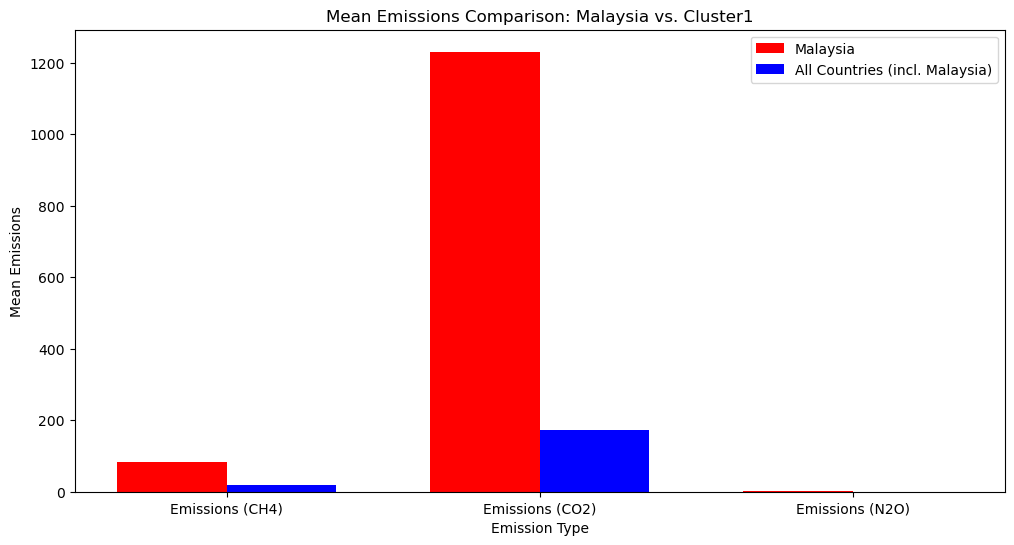

In [99]:
mean_emissions = filtered_emission.groupby(['Area', 'Element'])['Value'].mean().reset_index()
malaysia_mean_emissions = mean_emissions[mean_emissions['Area'] == 'Malaysia']
all_mean_emissions = mean_emissions.groupby('Element')['Value'].mean().reset_index()
elements = mean_emissions['Element'].unique()
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
bar_positions_malaysia = range(len(elements))
bar_positions_all = [pos + bar_width for pos in bar_positions_malaysia]
plt.bar(bar_positions_malaysia, malaysia_mean_emissions['Value'], width=bar_width, label='Malaysia', color='red')
plt.bar(bar_positions_all, all_mean_emissions['Value'], width=bar_width, label='All Countries (incl. Malaysia)', color='blue')
plt.xticks([pos + bar_width/2 for pos in bar_positions_malaysia], elements)
plt.xlabel('Emission Type')
plt.ylabel('Mean Emissions')
plt.title('Mean Emissions Comparison: Malaysia vs. Cluster1')
plt.legend()
plt.show()

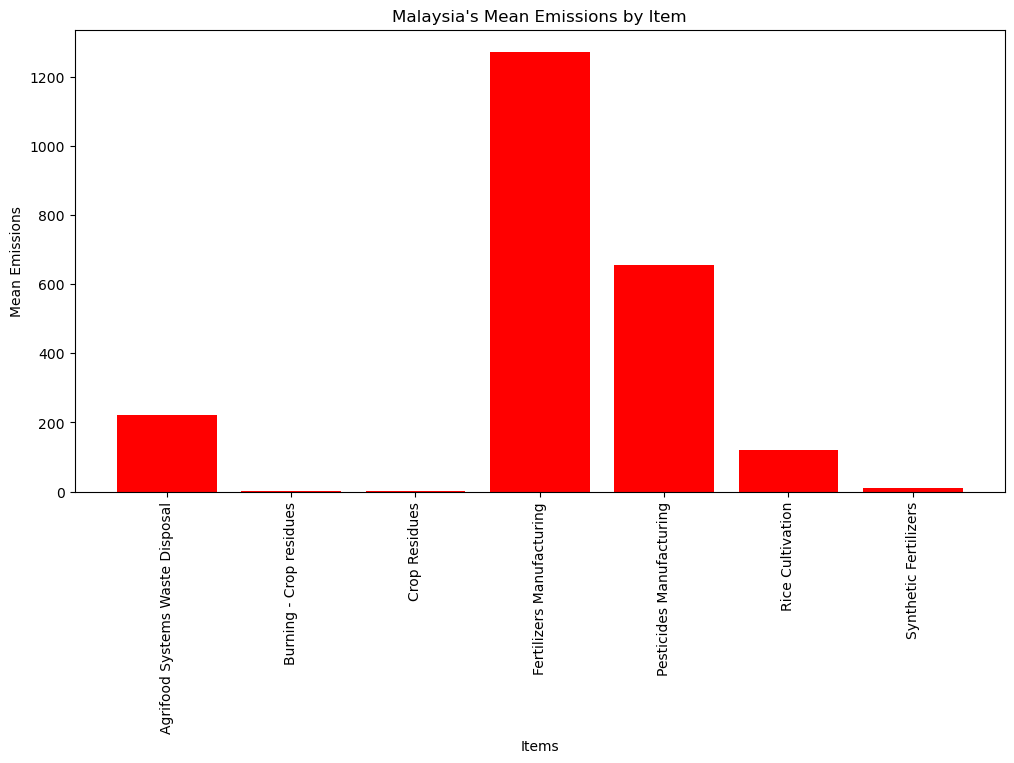

In [100]:
malaysia_emissions = filtered_emission[filtered_emission['Area'] == 'Malaysia']
mean_malaysia_emissions = malaysia_emissions.groupby('Item')['Value'].mean().reset_index()

items = mean_malaysia_emissions['Item']
values = mean_malaysia_emissions['Value']

fig, ax = plt.subplots(figsize=(12, 6))

plt.bar(items, values, color='red')

plt.xticks(rotation=90)
plt.xlabel('Items')
plt.ylabel('Mean Emissions')
plt.title("Malaysia's Mean Emissions by Item")

plt.show()

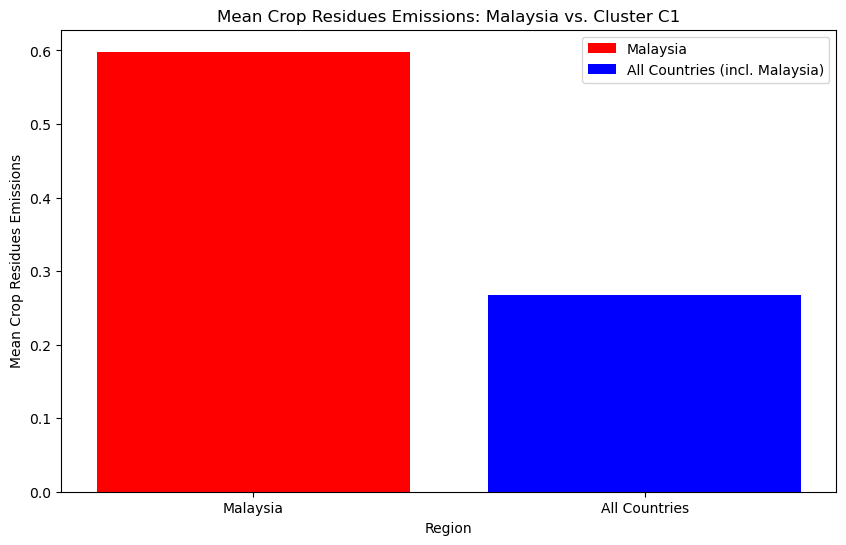

In [101]:
crop_residues_malaysia = filtered_emission[(filtered_emission['Item'] == 'Crop Residues') & (filtered_emission['Area'] == 'Malaysia')]
mean_crop_residues_malaysia = crop_residues_malaysia['Value'].mean()
crop_residues_all_countries = filtered_emission[(filtered_emission['Item'] == 'Crop Residues')]
mean_crop_residues_all_countries = crop_residues_all_countries['Value'].mean()
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar('Malaysia', mean_crop_residues_malaysia, color='red', label='Malaysia')
plt.bar('All Countries', mean_crop_residues_all_countries, color='blue', label='All Countries (incl. Malaysia)')
plt.xlabel('Region')
plt.ylabel('Mean Crop Residues Emissions')
plt.title('Mean Crop Residues Emissions: Malaysia vs. Cluster C1')
plt.legend()
plt.show()

In [102]:
foodloss_1 = pd.read_csv(r"C:\Users\amirj\OneDrive\Desktop\Food Nexus\foodloss_1.csv", encoding='ISO-8859-1')
foodloss_1

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5113,Opening stocks,2010,2010,tonnes,6720.00,E
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5113,Opening stocks,2011,2011,tonnes,7089.00,E
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5113,Opening stocks,2012,2012,tonnes,7440.00,E
3,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5113,Opening stocks,2013,2013,tonnes,7812.00,E
4,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5113,Opening stocks,2014,2014,tonnes,8058.00,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8882220,5817,'902,Net Food Importing Developing Countries,892,'22230.02,"Yoghurt, with additives",281,Fats/Year,2016,2016,tonnes,1267.20,I
8882221,5817,'902,Net Food Importing Developing Countries,892,'22230.02,"Yoghurt, with additives",281,Fats/Year,2017,2017,tonnes,1858.59,I
8882222,5817,'902,Net Food Importing Developing Countries,892,'22230.02,"Yoghurt, with additives",281,Fats/Year,2018,2018,tonnes,1881.90,I
8882223,5817,'902,Net Food Importing Developing Countries,892,'22230.02,"Yoghurt, with additives",281,Fats/Year,2019,2019,tonnes,1393.61,I


In [103]:
filtered_fl = c1_cluster_my.merge(foodloss_1, on='Area', how='inner')
filtered_fl

,Area,Cluster,Area Code,Area Code (M49),Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,Antigua and Barbuda,C1,8,'028,221,'01371,"Almonds, in shell",5113,Opening stocks,2010,2010,tonnes,0.0,E
1,Antigua and Barbuda,C1,8,'028,221,'01371,"Almonds, in shell",5113,Opening stocks,2011,2011,tonnes,0.0,E
2,Antigua and Barbuda,C1,8,'028,221,'01371,"Almonds, in shell",5113,Opening stocks,2012,2012,tonnes,0.0,E
3,Antigua and Barbuda,C1,8,'028,221,'01371,"Almonds, in shell",5113,Opening stocks,2013,2013,tonnes,0.0,E
4,Antigua and Barbuda,C1,8,'028,221,'01371,"Almonds, in shell",5113,Opening stocks,2014,2014,tonnes,0.0,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790864,Zambia,C1,251,'894,892,'22230.02,"Yoghurt, with additives",281,Fats/Year,2016,2016,tonnes,12.0,I
1790865,Zambia,C1,251,'894,892,'22230.02,"Yoghurt, with additives",281,Fats/Year,2017,2017,tonnes,0.0,I
1790866,Zambia,C1,251,'894,892,'22230.02,"Yoghurt, with additives",281,Fats/Year,2018,2018,tonnes,0.0,I
1790867,Zambia,C1,251,'894,892,'22230.02,"Yoghurt, with additives",281,Fats/Year,2019,2019,tonnes,0.0,I


In [104]:
columns_to_keep = ['Area', 'Cluster', 'Item', 'Element', 'Value', 'Year']
filtered_fl = filtered_fl[filtered_fl['Element'] == 'Loss']

filtered_fl = filtered_fl[columns_to_keep]

filtered_fl

,Area,Cluster,Item,Element,Value,Year
1312,Antigua and Barbuda,C1,Avocados,Loss,21.00,2010
1313,Antigua and Barbuda,C1,Avocados,Loss,5.00,2011
1314,Antigua and Barbuda,C1,Avocados,Loss,18.00,2012
1315,Antigua and Barbuda,C1,Avocados,Loss,16.00,2013
1316,Antigua and Barbuda,C1,Avocados,Loss,18.00,2014
...,...,...,...,...,...,...
1789482,Zambia,C1,Wheat,Loss,3375.00,2016
1789483,Zambia,C1,Wheat,Loss,5082.00,2017
1789484,Zambia,C1,Wheat,Loss,2961.00,2018
1789485,Zambia,C1,Wheat,Loss,9107.57,2019


In [105]:
total_fl_by_country_year = filtered_fl.groupby(['Area', 'Year'])['Value'].sum().reset_index()
fig = px.line(total_fl_by_country_year, x='Year', y='Value', color='Area',
              labels={'Value': 'Total Food Loss', 'Year': 'Year'})
fig.update_traces(mode='lines+markers', hovertemplate='<b>%{y} Food Loss</b> in %{x}')
fig.update_layout(title='Total Food Loss by Country Over Time',
                  xaxis_title='Year',
                  yaxis_title='Total Food Loss')
fig.show()

In [106]:
grouped_fl = filtered_fl.pivot_table(index='Area', columns='Item', values='Value', aggfunc='sum', fill_value=0)
grouped_fl['Sum_of_FoodLoss'] = grouped_fl.sum(axis=1)
grouped_fl.reset_index(inplace=True)
if 'Element' in grouped_fl.columns:
    grouped_fl.drop(columns=['Element'], inplace=True)
 
grouped_fl

Item,Area,"Almonds, in shell","Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw",Apples,Apricots,Areca nuts,Artichokes,Asparagus,Avocados,"Bambara beans, dry",Bananas,Barley,"Beans, dry","Beer of millet, malted","Beer of sorghum, malted",Blueberries,"Bovine meat, salted, dried or smoked","Brazil nuts, in shell","Broad beans and horse beans, dry","Broad beans and horse beans, green",Buckwheat,"Buffalo fat, unrendered",Butter of cow milk,"Buttermilk, curdled and acidified milk","Buttermilk, dry",Cabbages,Cantaloupes and other melons,Carrots and turnips,Casein,"Cashew nuts, in shell",Cashewapple,"Cassava, fresh",Castor oil seeds,"Cattle fat, unrendered",Cauliflowers and broccoli,Cereals n.e.c.,"Cheese from milk of buffalo, fresh or processed","Cheese from milk of goats, fresh or processed","Cheese from milk of sheep, fresh or processed",Cheese from skimmed cow milk,Cheese from whole cow milk,Cherries,"Chestnuts, in shell","Chick peas, dry",Chicory roots,"Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw","Chillies and peppers, green (Capsicum spp. and Pimenta spp.)",Cider and other fermented beverages,"Cinnamon and cinnamon-tree flowers, raw","Cloves (whole stems), raw",Cocoa beans,Coconut oil,"Coconuts, in shell","Coffee, green",Copra,Cotton seed,Cottonseed oil,"Cow peas, dry",Cucumbers and gherkins,Dairy products n.e.c.,Dates,"Edible offal of buffalo, fresh, chilled or frozen","Edible offal of cattle, fresh, chilled or frozen","Edible offal of goat, fresh, chilled or frozen","Edible offal of pigs, fresh, chilled or frozen","Edible offal of sheep, fresh, chilled or frozen","Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen","Edible offals and liver of ducks, fresh, chilled or frozen","Edible offals of camels and other camelids, fresh, chilled or frozen","Edible offals of horses and other equines, fresh, chilled or frozen","Edible roots and tubers with high starch or inulin content, n.e.c., fresh",Eggplants (aubergines),"Eggs from other birds in shell, fresh, n.e.c.","Extracts and juices of meat, fish, crustaceans, molluscs or other aquatic invertebrates",Fat of camels,Fat of other camelids,Fat of pigs,Fatty liver preparations,Figs,Flour of cassava,Fonio,"Game meat, fresh, chilled or frozen","Ginger, raw","Goat fat, unrendered",Grapes,Green corn (maize),Green garlic,"Groundnuts, excluding shelled","Hazelnuts, in shell","Hen eggs in shell, fresh",Homogenized meat preparations,"Horse meat, fresh or chilled",Ice cream and other edible ice,Karite nuts (sheanuts),Kola nuts,Leeks and other alliaceous vegetables,Lemons and limes,"Lentils, dry",Lettuce and chicory,Linseed,Lupins,Maize (corn),"Mangoes, guavas and mangosteens",Maté leaves,"Meat of buffalo, fresh or chilled","Meat of camels, fresh or chilled","Meat of cattle boneless, fresh or chilled","Meat of cattle with the bone, fresh or chilled","Meat of chickens, fresh or chilled","Meat of ducks, fresh or chilled","Meat of geese, fresh or chilled","Meat of goat, fresh or chilled","Meat of pig boneless, fresh or chilled","Meat of pig with the bone, fresh or chilled","Meat of pigeons and other birds n.e.c., fresh, chilled or frozen","Meat of rabbits and hares, fresh or chilled","Meat of sheep, fresh or chilled","Meat of turkeys, fresh or chilled",Meat prepared n.e.c.,Melonseed,Millet,Mushrooms and truffles,Mustard seed,Natural honey,"Nutmeg, mace, cardamoms, raw",Oats,Oil of palm kernel,Oil palm fruit,Okra,Olive oil,Olives,"Onions and shallots, dry (excluding dehydrated)","Onions and shallots, green",Oranges,"Other beans, green",Other berries and fruits of the genus vaccinium n.e.c.,"Other citrus fruit, n.e.c.","Other fruits, n.e.c.","Other meat and edible meat offal, salted, in brine, dried or smoked; edible flours and meals of meat or meat offal","Other meat n.e.c. (excluding mammals), fresh, chilled or frozen","Other nuts (excluding wild edible nuts and groundnuts), in shell, n.e.c.","Other oil seeds, n.e.c.",Other pulse

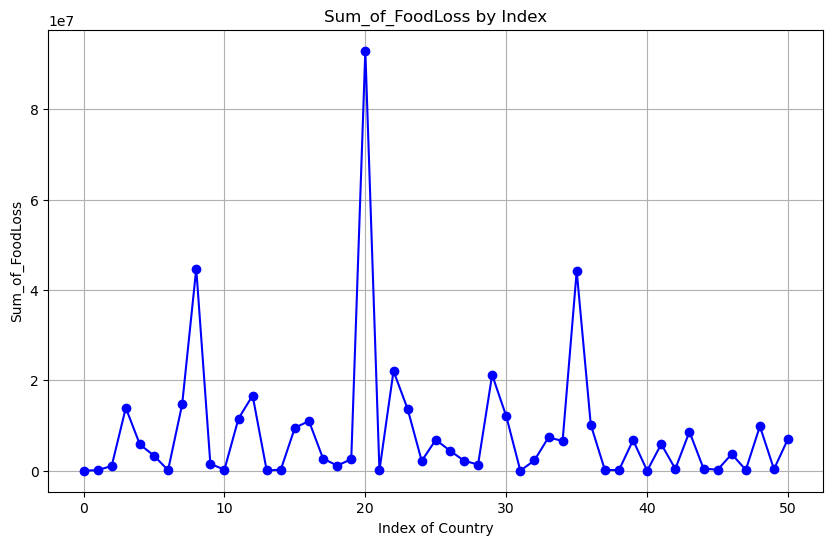

In [107]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_fl.index, grouped_fl['Sum_of_FoodLoss'], marker='o', linestyle='-', color='b')
plt.xlabel('Index of Country')
plt.ylabel('Sum_of_FoodLoss')
plt.title('Sum_of_FoodLoss by Index')
plt.grid(True)
plt.show()

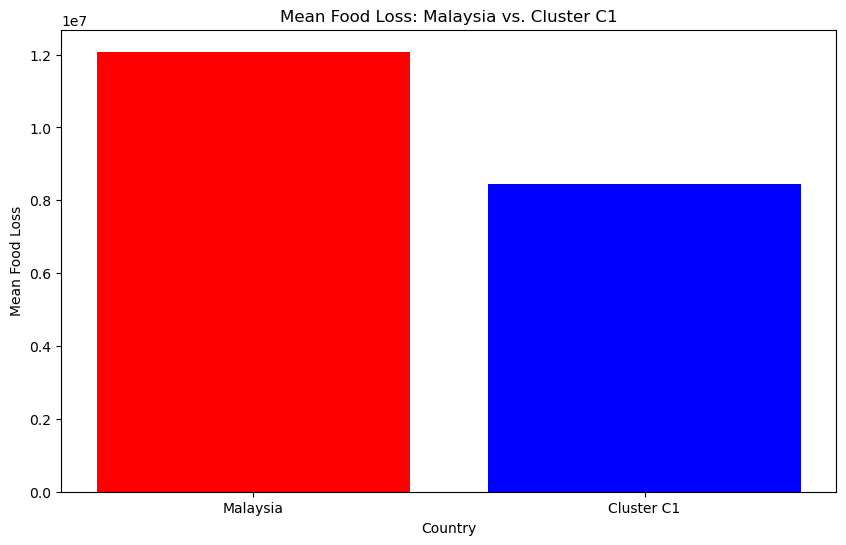

In [108]:
malaysia_mean = grouped_fl[grouped_fl['Area'] == 'Malaysia']['Sum_of_FoodLoss'].mean()
other_countries_mean = grouped_fl[grouped_fl['Area'] != 'Malaysia']['Sum_of_FoodLoss'].mean()
plt.figure(figsize=(10, 6))
plt.bar(['Malaysia', 'Cluster C1'], [malaysia_mean, other_countries_mean], color=['red', 'blue'])
plt.xlabel('Country')
plt.ylabel('Mean Food Loss')
plt.title('Mean Food Loss: Malaysia vs. Cluster C1')
plt.show()

In [109]:
malaysia_row = grouped_fl[grouped_fl['Area'] == 'Malaysia']
pd.set_option('display.max_columns', None)
malaysia_row


Item,Area,"Almonds, in shell","Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw",Apples,Apricots,Areca nuts,Artichokes,Asparagus,Avocados,"Bambara beans, dry",Bananas,Barley,"Beans, dry","Beer of millet, malted","Beer of sorghum, malted",Blueberries,"Bovine meat, salted, dried or smoked","Brazil nuts, in shell","Broad beans and horse beans, dry","Broad beans and horse beans, green",Buckwheat,"Buffalo fat, unrendered",Butter of cow milk,"Buttermilk, curdled and acidified milk","Buttermilk, dry",Cabbages,Cantaloupes and other melons,Carrots and turnips,Casein,"Cashew nuts, in shell",Cashewapple,"Cassava, fresh",Castor oil seeds,"Cattle fat, unrendered",Cauliflowers and broccoli,Cereals n.e.c.,"Cheese from milk of buffalo, fresh or processed","Cheese from milk of goats, fresh or processed","Cheese from milk of sheep, fresh or processed",Cheese from skimmed cow milk,Cheese from whole cow milk,Cherries,"Chestnuts, in shell","Chick peas, dry",Chicory roots,"Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw","Chillies and peppers, green (Capsicum spp. and Pimenta spp.)",Cider and other fermented beverages,"Cinnamon and cinnamon-tree flowers, raw","Cloves (whole stems), raw",Cocoa beans,Coconut oil,"Coconuts, in shell","Coffee, green",Copra,Cotton seed,Cottonseed oil,"Cow peas, dry",Cucumbers and gherkins,Dairy products n.e.c.,Dates,"Edible offal of buffalo, fresh, chilled or frozen","Edible offal of cattle, fresh, chilled or frozen","Edible offal of goat, fresh, chilled or frozen","Edible offal of pigs, fresh, chilled or frozen","Edible offal of sheep, fresh, chilled or frozen","Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen","Edible offals and liver of ducks, fresh, chilled or frozen","Edible offals of camels and other camelids, fresh, chilled or frozen","Edible offals of horses and other equines, fresh, chilled or frozen","Edible roots and tubers with high starch or inulin content, n.e.c., fresh",Eggplants (aubergines),"Eggs from other birds in shell, fresh, n.e.c.","Extracts and juices of meat, fish, crustaceans, molluscs or other aquatic invertebrates",Fat of camels,Fat of other camelids,Fat of pigs,Fatty liver preparations,Figs,Flour of cassava,Fonio,"Game meat, fresh, chilled or frozen","Ginger, raw","Goat fat, unrendered",Grapes,Green corn (maize),Green garlic,"Groundnuts, excluding shelled","Hazelnuts, in shell","Hen eggs in shell, fresh",Homogenized meat preparations,"Horse meat, fresh or chilled",Ice cream and other edible ice,Karite nuts (sheanuts),Kola nuts,Leeks and other alliaceous vegetables,Lemons and limes,"Lentils, dry",Lettuce and chicory,Linseed,Lupins,Maize (corn),"Mangoes, guavas and mangosteens",Maté leaves,"Meat of buffalo, fresh or chilled","Meat of camels, fresh or chilled","Meat of cattle boneless, fresh or chilled","Meat of cattle with the bone, fresh or chilled","Meat of chickens, fresh or chilled","Meat of ducks, fresh or chilled","Meat of geese, fresh or chilled","Meat of goat, fresh or chilled","Meat of pig boneless, fresh or chilled","Meat of pig with the bone, fresh or chilled","Meat of pigeons and other birds n.e.c., fresh, chilled or frozen","Meat of rabbits and hares, fresh or chilled","Meat of sheep, fresh or chilled","Meat of turkeys, fresh or chilled",Meat prepared n.e.c.,Melonseed,Millet,Mushrooms and truffles,Mustard seed,Natural honey,"Nutmeg, mace, cardamoms, raw",Oats,Oil of palm kernel,Oil palm fruit,Okra,Olive oil,Olives,"Onions and shallots, dry (excluding dehydrated)","Onions and shallots, green",Oranges,"Other beans, green",Other berries and fruits of the genus vaccinium n.e.c.,"Other citrus fruit, n.e.c.","Other fruits, n.e.c.","Other meat and edible meat offal, salted, in brine, dried or smoked; edible flours and meals of meat or meat offal","Other meat n.e.c. (excluding mammals), fresh, chilled or frozen","Other nuts (excluding wild edible nuts and groundnuts), in shell, n.e.c.","Other oil seeds, n.e.c.",Other pulse

In [110]:
malaysia_row = malaysia_row.apply(pd.to_numeric, errors='coerce')
columns_greater_than_1000 = malaysia_row.columns[malaysia_row.iloc[0] > 50000]
malaysia_row_filtered = malaysia_row[columns_greater_than_1000]
malaysia_row_filtered

Item,Bananas,Cabbages,"Coconuts, in shell",Cucumbers and gherkins,"Hen eggs in shell, fresh",Maize (corn),"Mangoes, guavas and mangosteens",Oil of palm kernel,Oil palm fruit,"Other fruits, n.e.c.","Other tropical fruits, n.e.c.","Other vegetables, fresh n.e.c.",Palm oil,Pineapples,Raw milk of cattle,Rice,Spinach,Tomatoes,Watermelons,Sum_of_FoodLoss
30,630873.01,105737.43,471826.7,84926.66,319057.45,1964667.58,71425.05,280249.43,4027543.35,98922.69,103255.97,494160.13,1101443.14,306180.76,61036.07,1121972.76,52319.73,127834.83,174915.95,12077874.55


<Figure size 1200x600 with 0 Axes>

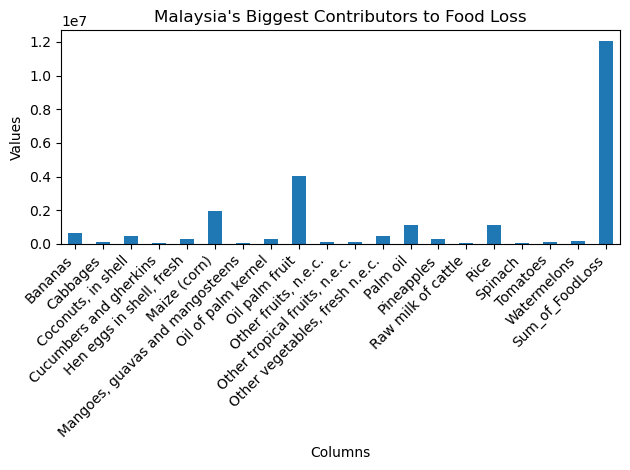

In [111]:

plt.figure(figsize=(12, 6))
malaysia_row_filtered.T.plot(kind='bar', legend=False)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title("Malaysia's Biggest Contributors to Food Loss")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

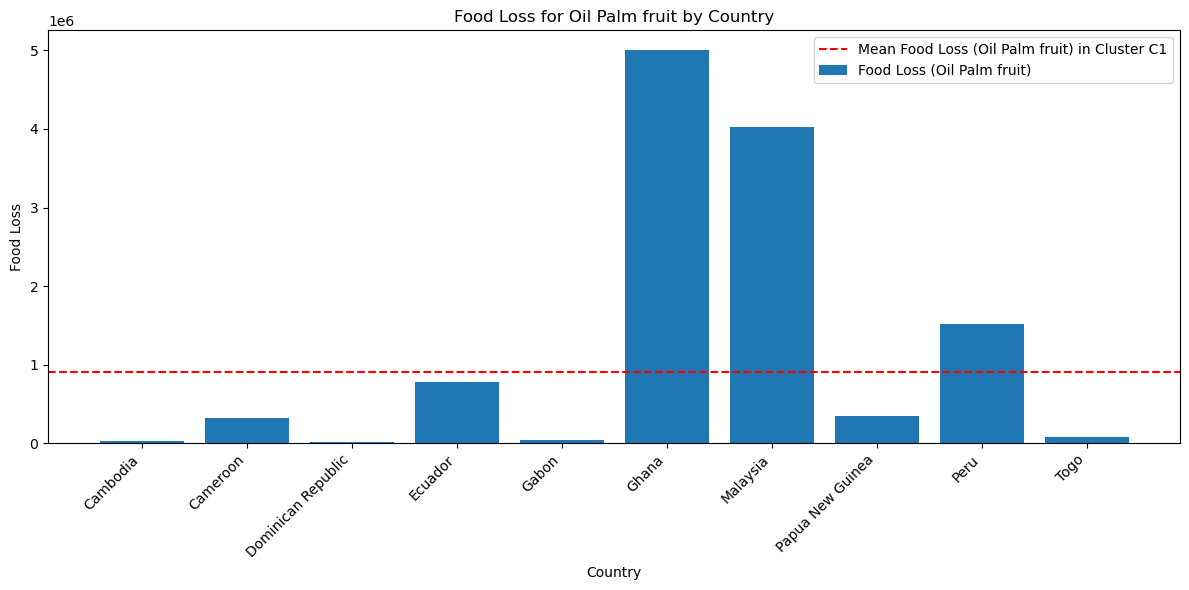

In [112]:
countries_to_include = ['Malaysia', 'Cambodia', 'Cameroon', 'Ecuador', 'Dominican Republic', 'Ghana', 'Gabon', 'Papua New Guinea', 'Peru', 'Togo']
fl_filtered_df = grouped_fl[grouped_fl['Area'].isin(countries_to_include)][['Area', 'Oil palm fruit']]
mean_food_loss_oil_palm = fl_filtered_df[fl_filtered_df['Area'] != 'Malaysia']['Oil palm fruit'].mean()
plt.figure(figsize=(12, 6))
plt.bar(fl_filtered_df['Area'], fl_filtered_df['Oil palm fruit'], label='Food Loss (Oil Palm fruit)')
plt.axhline(mean_food_loss_oil_palm, color='red', linestyle='--', label=f'Mean Food Loss (Oil Palm fruit) in Cluster C1')
plt.xlabel('Country')
plt.ylabel('Food Loss')
plt.title('Food Loss for Oil Palm fruit by Country')
plt.xticks(rotation=45, ha='right') 
plt.legend()
plt.tight_layout()
plt.show()

In [113]:
prod_latest = pd.read_csv(r"C:\Users\amirj\OneDrive\Desktop\Food Nexus\prod_latest.csv")
prod_latest

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,458,Malaysia,5510,Production,01929.07,"Abaca, manila hemp, raw",2020,2020,t,0.00,M,"Missing value (data cannot exist, not applicable)"
1,QCL,Crops and livestock products,458,Malaysia,5510,Production,01379.01,Areca nuts,2020,2020,t,2.20,A,Official figure
2,QCL,Crops and livestock products,458,Malaysia,5510,Production,01311,Avocados,2020,2020,t,210.00,A,Official figure
3,QCL,Crops and livestock products,458,Malaysia,5510,Production,01312,Bananas,2020,2020,t,313811.33,A,Official figure
4,QCL,Crops and livestock products,458,Malaysia,5510,Production,24310.01,"Beer of barley, malted",2020,2020,t,200000.00,T,Unofficial figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,QCL,Crops and livestock products,458,Malaysia,5510,Production,01530,Sweet potatoes,2020,2020,t,54750.36,A,Official figure
57,QCL,Crops and livestock products,458,Malaysia,5510,Production,01620,Tea leaves,2020,2020,t,9395.13,A,Official figure
58,QCL,Crops and livestock products,458,Malaysia,5510,Production,01234,Tomatoes,2020,2020,t,192129.47,A,Official figure
59,QCL,Crops and livestock products,458,Malaysia,5510,Production,01970,Unmanufactured tobacco,2020,2020,t,211.00,A,Official figure


In [114]:
prod_latest_col = ['Area', 'Item', 'Value', 'Year']

prod_latest = prod_latest[prod_latest_col]

prod_latest

,Area,Item,Value,Year
0,Malaysia,"Abaca, manila hemp, raw",0.00,2020
1,Malaysia,Areca nuts,2.20,2020
2,Malaysia,Avocados,210.00,2020
3,Malaysia,Bananas,313811.33,2020
4,Malaysia,"Beer of barley, malted",200000.00,2020
...,...,...,...,...
56,Malaysia,Sweet potatoes,54750.36,2020
57,Malaysia,Tea leaves,9395.13,2020
58,Malaysia,Tomatoes,192129.47,2020
59,Malaysia,Unmanufactured tobacco,211.00,2020


In [115]:
prod_latest = prod_latest.pivot_table(index='Area', columns='Item', values='Value', aggfunc='sum', fill_value=0)
prod_latest.reset_index(inplace=True)

 
prod_latest

Item,Area,"Abaca, manila hemp, raw",Areca nuts,Avocados,Bananas,"Beer of barley, malted",Cabbages,"Cashew nuts, in shell","Cassava, fresh","Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw","Chillies and peppers, green (Capsicum spp. and Pimenta spp.)","Cloves (whole stems), raw",Cocoa beans,Coconut oil,"Coconuts, in shell","Coffee, green","Coir, raw",Cucumbers and gherkins,"Edible roots and tubers with high starch or inulin content, n.e.c., fresh","Ginger, raw",Groundnut oil,"Groundnuts, excluding shelled","Kenaf, and other textile bast fibres, raw or retted",Lemons and limes,Lettuce and chicory,Maize (corn),"Mangoes, guavas and mangosteens",Margarine and shortening,Molasses,Natural rubber in primary forms,"Nutmeg, mace, cardamoms, raw",Oil of palm kernel,Oil of sesame seed,Oil palm fruit,Okra,Oranges,"Other citrus fruit, n.e.c.","Other fruits, n.e.c.","Other oil seeds, n.e.c.","Other stimulant, spice and aromatic crops, n.e.c.","Other tropical fruits, n.e.c.","Other vegetables, fresh n.e.c.",Palm kernels,Palm oil,Papayas,"Pepper (Piper spp.), raw",Pineapples,Pomelos and grapefruits,"Pumpkins, squash and gourds","Rapeseed or canola oil, crude",Raw cane or beet sugar (centrifugal only),Rice,Soya bean oil,Soya beans,Spinach,Sugar cane,"Sunflower-seed oil, crude",Sweet potatoes,Tea leaves,Tomatoes,Unmanufactured tobacco,Watermelons
0,Malaysia,0,2.2,210,313811.33,200000,80641.17,16244.88,37513.74,2357.72,28264.36,219.18,706,49600,560984.32,4241.08,20717.34,101481.97,4103.87,11751.22,3773.92,226.53,6450,18248.32,54583.69,68207.37,74012,190707,632.72,514702,42.72,2203313,4322.93,96969316,57860.63,10511.47,3871.9,112092.73,226549.56,755.99,81916.75,564726.33,4703981,19140613,61775.75,30804,323420.45,16040,25691.18,19800,1776.67,2356391.9,115600,0,74250.84,23519.41,2001.33,54750.36,9395.13,192129.47,211,134225.37


In [116]:
columns_to_keep = [
    'Bananas', 'Watermelons', 'Pineapples', 'Rice', 'Cucumbers and gherkins', 
    'Coconuts, in shell', 'Tomatoes', 'Mangoes, guavas and mangosteens', 
    'Oil of palm kernel', 'Spinach', 'Cabbages', 'Oil palm fruit', 
    'Palm oil'
]

prod_latest = prod_latest[columns_to_keep]
prod_latest

Item,Bananas,Watermelons,Pineapples,Rice,Cucumbers and gherkins,"Coconuts, in shell",Tomatoes,"Mangoes, guavas and mangosteens",Oil of palm kernel,Spinach,Cabbages,Oil palm fruit,Palm oil
0,313811.33,134225.37,323420.45,2356391.9,101481.97,560984.32,192129.47,74012,2203313,74250.84,80641.17,96969316,19140613


In [117]:
loss_latest = pd.read_csv(r"C:\Users\amirj\OneDrive\Desktop\Food Nexus\loss_latest.csv")
loss_latest

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,SCL,Supply Utilization Accounts (2010-),458,Malaysia,5016,Loss,1379.01,Areca nuts,2020,2020,t,44.47,I,Imputed value
1,SCL,Supply Utilization Accounts (2010-),458,Malaysia,5016,Loss,1312.00,Bananas,2020,2020,t,59079.96,I,Imputed value
2,SCL,Supply Utilization Accounts (2010-),458,Malaysia,5016,Loss,21513.00,"Buffalo fat, unrendered",2020,2020,t,6.33,I,Imputed value
3,SCL,Supply Utilization Accounts (2010-),458,Malaysia,5016,Loss,1212.00,Cabbages,2020,2020,t,8155.20,I,Imputed value
4,SCL,Supply Utilization Accounts (2010-),458,Malaysia,5016,Loss,1372.00,"Cashew nuts, in shell",2020,2020,t,323.08,I,Imputed value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,SCL,Supply Utilization Accounts (2010-),458,Malaysia,5016,Loss,1802.00,Sugar cane,2020,2020,t,1316.05,I,Imputed value
52,SCL,Supply Utilization Accounts (2010-),458,Malaysia,5016,Loss,1530.00,Sweet potatoes,2020,2020,t,4944.68,I,Imputed value
53,SCL,Supply Utilization Accounts (2010-),458,Malaysia,5016,Loss,1620.00,Tea leaves,2020,2020,t,619.90,I,Imputed value
54,SCL,Supply Utilization Accounts (2010-),458,Malaysia,5016,Loss,1234.00,Tomatoes,2020,2020,t,13123.38,I,Imputed value


In [118]:
loss_latest_col = ['Area', 'Item', 'Value', 'Year']

loss_latest = loss_latest[loss_latest_col]

loss_latest

,Area,Item,Value,Year
0,Malaysia,Areca nuts,44.47,2020
1,Malaysia,Bananas,59079.96,2020
2,Malaysia,"Buffalo fat, unrendered",6.33,2020
3,Malaysia,Cabbages,8155.20,2020
4,Malaysia,"Cashew nuts, in shell",323.08,2020
...,...,...,...,...
51,Malaysia,Sugar cane,1316.05,2020
52,Malaysia,Sweet potatoes,4944.68,2020
53,Malaysia,Tea leaves,619.90,2020
54,Malaysia,Tomatoes,13123.38,2020


In [119]:
loss_latest = loss_latest.pivot_table(index='Area', columns='Item', values='Value', aggfunc='sum', fill_value=0)
loss_latest.reset_index(inplace=True)

 
loss_latest

Item,Area,Areca nuts,Bananas,"Buffalo fat, unrendered",Cabbages,"Cashew nuts, in shell","Cassava, fresh","Cattle fat, unrendered","Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw","Chillies and peppers, green (Capsicum spp. and Pimenta spp.)","Cloves (whole stems), raw",Cocoa beans,"Coconuts, in shell","Coffee, green",Cucumbers and gherkins,"Edible offal of cattle, fresh, chilled or frozen","Edible offal of goat, fresh, chilled or frozen","Edible offal of pigs, fresh, chilled or frozen","Edible offals of horses and other equines, fresh, chilled or frozen","Edible roots and tubers with high starch or inulin content, n.e.c., fresh","Eggs from other birds in shell, fresh, n.e.c.",Fat of pigs,"Ginger, raw","Goat fat, unrendered","Groundnuts, excluding shelled","Hen eggs in shell, fresh",Lemons and limes,Lettuce and chicory,Maize (corn),"Mangoes, guavas and mangosteens","Nutmeg, mace, cardamoms, raw",Oil of palm kernel,Oil palm fruit,Okra,Oranges,"Other citrus fruit, n.e.c.","Other fruits, n.e.c.","Other oil seeds, n.e.c.","Other stimulant, spice and aromatic crops, n.e.c.","Other tropical fruits, n.e.c.","Other vegetables, fresh n.e.c.",Palm oil,Papayas,"Pepper (Piper spp.), raw",Pineapples,Pomelos and grapefruits,"Pumpkins, squash and gourds",Raw milk of buffalo,Raw milk of cattle,Rice,"Sheep fat, unrendered",Spinach,Sugar cane,Sweet potatoes,Tea leaves,Tomatoes,Watermelons
0,Malaysia,44.47,59079.96,6.33,8155.2,323.08,2263.59,4232.67,130.46,3400.13,47.35,54.94,49242.28,472.07,8152.02,249.02,11.48,436.6,1,385.03,4437.38,1342.14,891.73,2.55,22.09,32275.09,1050.35,4681.05,195837.72,6992.72,2.57,24955.31,1326346.3,11572.13,1076.95,323.16,9892.54,16255.87,91.42,8644.63,45683.83,100287.06,2481.23,1598.94,24339.16,1298.69,2121.88,370.96,5465.04,95366.38,1.35,5981.88,1316.05,4944.68,619.9,13123.38,11762.93


In [120]:
loss_latest

Item,Area,Areca nuts,Bananas,"Buffalo fat, unrendered",Cabbages,"Cashew nuts, in shell","Cassava, fresh","Cattle fat, unrendered","Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw","Chillies and peppers, green (Capsicum spp. and Pimenta spp.)","Cloves (whole stems), raw",Cocoa beans,"Coconuts, in shell","Coffee, green",Cucumbers and gherkins,"Edible offal of cattle, fresh, chilled or frozen","Edible offal of goat, fresh, chilled or frozen","Edible offal of pigs, fresh, chilled or frozen","Edible offals of horses and other equines, fresh, chilled or frozen","Edible roots and tubers with high starch or inulin content, n.e.c., fresh","Eggs from other birds in shell, fresh, n.e.c.",Fat of pigs,"Ginger, raw","Goat fat, unrendered","Groundnuts, excluding shelled","Hen eggs in shell, fresh",Lemons and limes,Lettuce and chicory,Maize (corn),"Mangoes, guavas and mangosteens","Nutmeg, mace, cardamoms, raw",Oil of palm kernel,Oil palm fruit,Okra,Oranges,"Other citrus fruit, n.e.c.","Other fruits, n.e.c.","Other oil seeds, n.e.c.","Other stimulant, spice and aromatic crops, n.e.c.","Other tropical fruits, n.e.c.","Other vegetables, fresh n.e.c.",Palm oil,Papayas,"Pepper (Piper spp.), raw",Pineapples,Pomelos and grapefruits,"Pumpkins, squash and gourds",Raw milk of buffalo,Raw milk of cattle,Rice,"Sheep fat, unrendered",Spinach,Sugar cane,Sweet potatoes,Tea leaves,Tomatoes,Watermelons
0,Malaysia,44.47,59079.96,6.33,8155.2,323.08,2263.59,4232.67,130.46,3400.13,47.35,54.94,49242.28,472.07,8152.02,249.02,11.48,436.6,1,385.03,4437.38,1342.14,891.73,2.55,22.09,32275.09,1050.35,4681.05,195837.72,6992.72,2.57,24955.31,1326346.3,11572.13,1076.95,323.16,9892.54,16255.87,91.42,8644.63,45683.83,100287.06,2481.23,1598.94,24339.16,1298.69,2121.88,370.96,5465.04,95366.38,1.35,5981.88,1316.05,4944.68,619.9,13123.38,11762.93


In [121]:
prod_latest

Item,Bananas,Watermelons,Pineapples,Rice,Cucumbers and gherkins,"Coconuts, in shell",Tomatoes,"Mangoes, guavas and mangosteens",Oil of palm kernel,Spinach,Cabbages,Oil palm fruit,Palm oil
0,313811.33,134225.37,323420.45,2356391.9,101481.97,560984.32,192129.47,74012,2203313,74250.84,80641.17,96969316,19140613


In [122]:
malaysia_plants_1 = list(prod_latest.columns)
grouped_plants_1 = list(loss_latest.columns)
common_plants_1 = list(set(malaysia_plants_1).intersection(grouped_plants_1))
new_final_loss = pd.concat([prod_latest[common_plants_1], loss_latest[common_plants_1]], axis=0)
new_final_loss.index = ['Production', 'Food Loss']
new_final_loss

Item,Watermelons,Pineapples,Cucumbers and gherkins,"Coconuts, in shell",Tomatoes,"Mangoes, guavas and mangosteens",Spinach,Cabbages,Oil palm fruit,Palm oil,Rice,Oil of palm kernel,Bananas
Production,134225.37,323420.45,101481.97,560984.32,192129.47,74012.00,74250.84,80641.17,96969316.0,19140613.00,2356391.90,2203313.00,313811.33
Food Loss,11762.93,24339.16,8152.02,49242.28,13123.38,6992.72,5981.88,8155.20,1326346.3,100287.06,95366.38,24955.31,59079.96


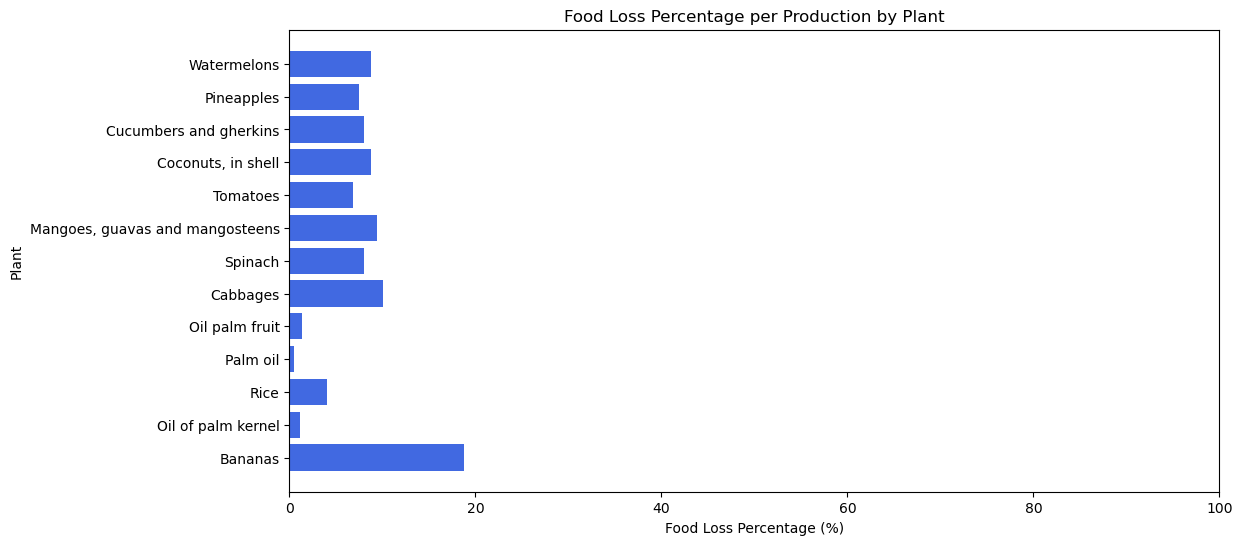

In [123]:
food_loss_percentage_final = (new_final_loss.loc['Food Loss'] / new_final_loss.loc['Production']) * 100
percentage_df_ml_final = pd.DataFrame({'Plant': food_loss_percentage_final.index, 'Food Loss Percentage': food_loss_percentage_final.values})
plt.figure(figsize=(12, 6))
plt.barh(percentage_df_ml_final['Plant'], percentage_df_ml_final['Food Loss Percentage'], color='royalblue')
plt.xlabel('Food Loss Percentage (%)')
plt.ylabel('Plant')
plt.title('Food Loss Percentage per Production by Plant')
plt.gca().invert_yaxis() 
plt.xlim(0, 100)

plt.show()